<a href="https://colab.research.google.com/github/AnasAkenoun/ODE-and-Linear-Algebra/blob/main/ODE_and_Linear_Algebra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **Problem1**

 Solve numerically the following system of ODE, which represents a predator-prey dynamics.
Amount of preys population is denoted by 𝑥1 and the amount of predators by 𝑥2

** Problem2**

There is a System of Linear Algebraic equations $ Affix = b; A[N ×N]; x,b ffiR^N $ , where 𝐴 is a Hilbert matrix
• Solve the system using 1 direct and 1 iterative method that you know, for 𝑁 = 4, 8, 16, 32.
• Compare your results with the exact solution: 𝑥𝑖 = 1; 𝑖 = 1, 𝑁.
• Compute residual and the error norms and make conclusions regarding applicability of direct
and iterative methods.

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  3.214e-02 ...  1.996e+01  2.000e+01]
        y: [[ 2.500e+04  2.346e+04 ...  8.341e+02  5.143e+02]
            [ 1.000e+03  1.872e+03 ...  3.779e+03  3.190e+03]]
      sol: None
 t_events: None
 y_events: None
     nfev: 1376
     njev: 0
      nlu: 0


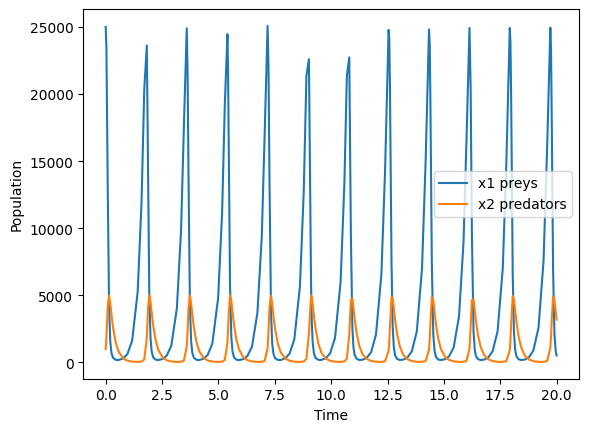

In [14]:
########## Problem1 ########

#                       Standard method                              #

import numpy as np
from scipy.integrate import solve_ivp

# Define the system of ODEs
def system(t, x):
    a1 = 5
    b12 = 0.005
    a2 = 5
    b21 = 0.001


    dx2dt = -a2 * x[1] + b21 * x[0] * x[1]
    dx1dt = a1*x[0]-b12*x[0]*x[1]

    return [dx1dt, dx2dt]

# Set initial conditions
x0 = np.array([25000, 1000])

# Set time range
t_ran = (0, 20)

# Solve the ODE system
sol = solve_ivp(system, t_ran, x0)
print(sol)
# Access the solution
t = sol.t
x1 = sol.y[0]
x2 = sol.y[1]

# Plot the population dynamics
import matplotlib.pyplot as plt

plt.plot(t, x1, label='x1 preys')
plt.plot(t, x2, label='x2 predators')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.show()





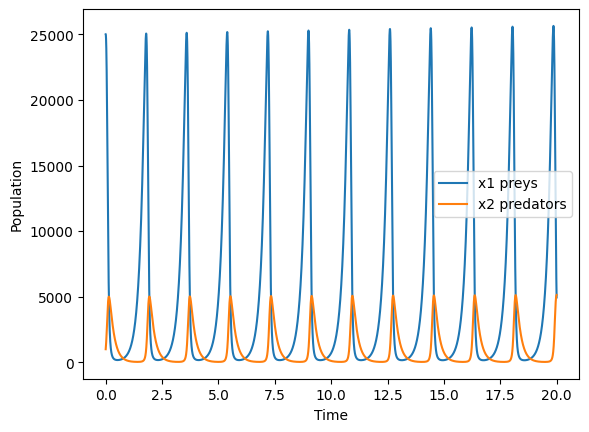

In [18]:
########## Problem1 ########

#                       Euler's method                              #

#Implementing the Euler's method to solve the system of ODEs:

import numpy as np
import matplotlib.pyplot as plt

# Define the system of ODEs
def system(t, x):
    a1 = 5
    b12 = 0.005
    a2 = 5
    b21 = 0.001

    dx2dt = -a2 * x[1] + b21 * x[0] * x[1]
    dx1dt = a1*x[0]-b12*x[0]*x[1]

    return np.array([dx1dt, dx2dt])

# Set initial conditions
x0 = np.array([25000, 1000])

# Set time step and number of iterations
dt = 0.0001
num_steps = 200000

# Initialize arrays to store data
t = np.zeros(num_steps+1)
x1 = np.zeros(num_steps+1)
x2 = np.zeros(num_steps+1)

# Set initial values
t[0] = 0
x1[0] = x0[0]
x2[0] = x0[1]

# Euler's method iteration (Forward method)
for i in range(num_steps):
    t[i+1] = t[i] + dt
    x = np.array([x1[i], x2[i]])
    dxdt = system(t[i], x)
    x1[i+1] = x1[i] + dt * dxdt[0]      ### Explicit Euler
    x2[i+1] = x2[i] + dt * dxdt[1]

# Plot the population dynamics
plt.plot(t, x1, label='x1 preys')
plt.plot(t, x2, label='x2 predators')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.show()



In [10]:
################# Problem2 ####################""""""


#Direct method:

import numpy as np

# Define the size of the matrix
N = 5

# Define the Hilbert matrix
A = np.zeros((N, N))
for i in range(N):
    for j in range(N):
        A[i][j] = 1 / (i + j + 1)

# Define the B vector
B = np.zeros((N, 1))
for i in range(N):
    B[i] = sum(A[i])

# Solve the system using the direct method
x = np.linalg.solve(A, B)

# Print the solution
print(x)


[[1.]
 [1.]
 [1.]
 [1.]
 [1.]]


In [11]:
#Iterative method:

import numpy as np

# Define the size of the matrix
N = 5

# Define the Hilbert matrix
A = np.zeros((N, N))
for i in range(N):
    for j in range(N):
        A[i][j] = 1 / (i + j + 1)

# Define the B vector
B = np.zeros((N, 1))
for i in range(N):
    B[i] = sum(A[i])

# Initialize the solution vector
x = np.zeros((N, 1))

# Define the maximum number of iterations
max_iter = 1000

# Define the tolerance
tol = 1e-6

# Perform the iterative method
for k in range(max_iter):
    r = B - np.dot(A, x)
    if np.linalg.norm(r) < tol:
        break
    z = np.dot(np.transpose(A), r)
    alpha = np.dot(np.transpose(r), r) / np.dot(np.transpose(z), z)
    x = x + alpha * r

# Print the solution
print(x)



[[0.99999106]
 [1.00043082]
 [0.99787372]
 [1.00323289]
 [0.99847108]]


In [12]:
#Analytical solution:

import numpy as np

# Define the size of the matrix
N = 5

# Define the analytical solution
x_analytical = np.ones((N, 1))

# Print the solution
print(x_analytical)

#Residual and error norms:

import numpy as np

# Define the size of the matrix
N = 5

# Define the Hilbert matrix
A = np.zeros((N, N))
for i in range(N):
    for j in range(N):
        A[i][j] = 1 / (i + j + 1)

# Define the B vector
B = np.zeros((N, 1))
for i in range(N):
    B[i] = sum(A[i])

# Solve the system using the direct method
x_direct = np.linalg.solve(A, B)

# Initialize the solution vector for the iterative method
x_iterative = np.zeros((N, 1))

# Define the maximum number of iterations for the iterative method
max_iter = 1000

# Define the tolerance for the iterative method
tol = 1e-6

# Perform the iterative method (conjugate gradient method)
for k in range(max_iter):
    r = B - np.dot(A, x_iterative)
    if np.linalg.norm(r) < tol:
        break
    z = np.dot(np.transpose(A), r)
    alpha = np.dot(np.transpose(r), r) / np.dot(np.transpose(z), z)    #### As described in the reference; the purpose of z and alpha
                                                                       ######## is to find a search direction that minimizes the error in each iteration
    x_iterative = x_iterative + alpha * r

# Define the analytical solution
x_analytical = np.ones((N, 1))

# Compute the residual norms
residual_direct = np.linalg.norm(B - np.dot(A, x_direct))
residual_iterative = np.linalg.norm(B - np.dot(A, x_iterative))

# Compute the error norms
error_direct = np.linalg.norm(x_direct - x_analytical)
error_iterative = np.linalg.norm(x_iterative - x_analytical)

# Print the results
print("Residual norm (direct method):", residual_direct)
print("Residual norm (iterative method):", residual_iterative)
print("Error norm (direct method):", error_direct)
print("Error norm (iterative method):", error_iterative)



[[1.]
 [1.]
 [1.]
 [1.]
 [1.]]
Residual norm (direct method): 2.7194799110210365e-16
Residual norm (iterative method): 9.02253712059251e-07
Error norm (direct method): 3.7629505159417226e-12
Error norm (iterative method): 0.004182817835217512
